In [1]:
import sys
import os
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add it to sys.path
sys.path.append(project_root)

In [29]:
from bimpcc.dataset import get_dataset
from bimpcc.models import TVDenoising
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr

In [131]:
def plot_experiment(true,noisy,u, alpha):
    
    fig,ax = plt.subplots(1,3,figsize=(14,4))
    ax[0].imshow(true,cmap='gray')
    ax[0].set_title('True Image')
    ax[0].axis('off')
    ax[1].imshow(noisy,cmap='gray')
    ax[1].set_title('Noisy Image\nPSNR: {:.4f}'.format(psnr(true,noisy)))
    ax[1].axis('off')
    ax[2].imshow(u,cmap='gray')
    ax[2].set_title(f'Reconstructed Image\nPSNR: {psnr(true,u):.4f}\n alpha = {alpha}')
    # ax[2].set_xlabel('alpha = {}'.format(alpha))
    ax[2].axis('off')

    plt.show()

In [122]:
scale = 100

In [123]:
dataset = get_dataset("wood",scale=scale)
true, noisy = dataset.get_training_data()

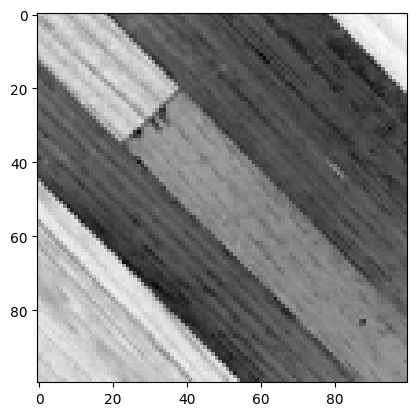

In [124]:
plt.imshow(true,cmap='gray')

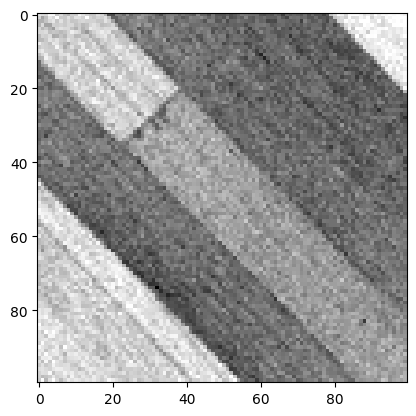

In [125]:
plt.imshow(noisy,cmap='gray')

In [126]:
flatten_true = true.flatten()
flatten_noisy = noisy.flatten()

In [127]:
model = TVDenoising(true,noisy)

In [128]:
res,x_opt,fun_opt = model.solve(print_level=5)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:   188200
Number of nonzeros in inequality constraint Jacobian.:    49500
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:    59501
                     variables with only lower bounds:    29801
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:    49600
Total number of inequality constraints...............:    19800
        inequality constraints with only lower bounds:    19800
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.2097811e+01 5.30e-01 1.95e-01   0.0 0.00e+00    -  0.00e+00 0.00e+00 

In [129]:
u, q, r, delta, theta, alpha = model.parse_vars(x_opt)
u = u.reshape((scale,scale))

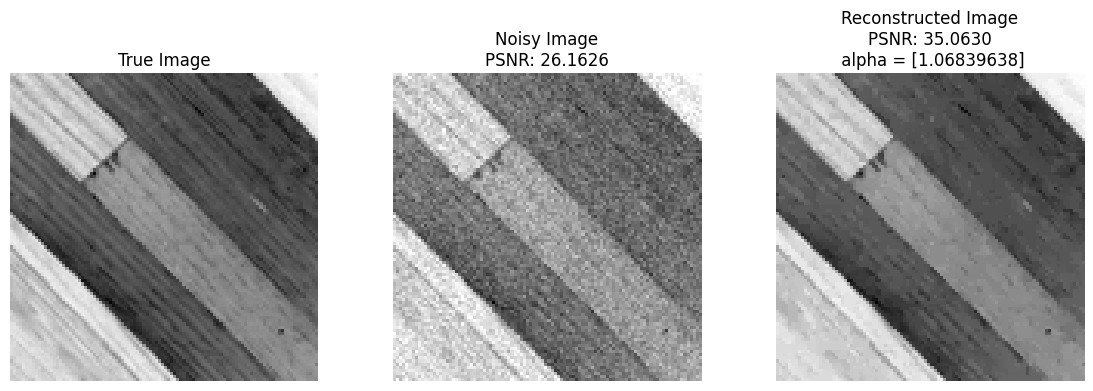

In [132]:
plot_experiment(true,noisy,u,alpha)